## THIS IMPLEMENTATION USES A2C FROM https://github.com/hermesdt/reinforcement-learning/blob/master/a2c/cartpole_a2c_episodic.ipynb


In [20]:
import numpy as np
import torch
import gymnasium as gym
from torch import nn
import matplotlib.pyplot as plt
from A2C_2 import A2Cx
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
# helper function to convert numpy arrays to tensors
def t(x): return torch.from_numpy(x).float()

In [44]:
env = gym.make("CartPole-v1")

In [45]:
# config
state_dim = env.observation_space.shape[0]
n_actions = env.action_space.n
max_steps = 5
n_envs = 1
n_episodes = 500

#define Hyperparameters
gamma = 0.999
lam = 0.95  # hyperparameter for GAE
ent_coef = 0.01  # coefficient for the entropy bonus (to encourage exploration)
actor_lr = 0.001
critic_lr = 0.005


agent = A2Cx(state_dim, n_actions,device='cpu',critic_lr= critic_lr, actor_lr= actor_lr, n_envs=n_envs)



In [46]:
state = env.reset()
state[0]

array([ 0.04481887, -0.03547717,  0.04007838, -0.03924002], dtype=float32)

In [47]:
episode_rewards = []

for i in range(n_episodes):
    done = False
    total_reward = 0
    state = env.reset()[0]
    steps = 0
    print("episode ", i)

    while not done or not truncated:
        value,probs = agent.forward(t(state))


        dist = torch.distributions.Categorical(probs=probs)
        action = dist.sample()

        
        next_state, reward, done, truncated, info = env.step(action.detach().data.numpy())

        
        total_reward += reward
        steps += 1
        agent.memory.add(dist.log_prob(action), value, reward, done)
        
        state = next_state
        
        # train if done or num steps > max_steps
        if done or (steps % max_steps == 0):
            last_q_val,_ = agent.forward(next_state)
            last_q_val = last_q_val.item()
       
            agent.trainx(last_q_val,gamma)
            agent.memory.clear()
            
    episode_rewards.append(total_reward)

episode  0


/opt/anaconda3/envs/rl_project/lib/python3.9/site-packages/gymnasium/envs/classic_control/cartpole.py:180: UserWarning: WARN: You are calling 'step()' even though this environment has already returned terminated = True. You should always call 'reset()' once you receive 'terminated = True' -- any further steps are undefined behavior.
  logger.warn(


episode  1
episode  2
episode  3
episode  4
episode  5
episode  6
episode  7
episode  8
episode  9
episode  10
episode  11
episode  12
episode  13
episode  14
episode  15
episode  16
episode  17
episode  18
episode  19
episode  20
episode  21
episode  22
episode  23
episode  24
episode  25
episode  26
episode  27
episode  28
episode  29
episode  30
episode  31
episode  32
episode  33
episode  34
episode  35
episode  36
episode  37
episode  38
episode  39
episode  40


KeyboardInterrupt: 

In [48]:
episode_rewards

[12.0,
 14.0,
 10.0,
 8.0,
 11.0,
 10.0,
 8.0,
 10.0,
 10.0,
 10.0,
 8.0,
 8.0,
 10.0,
 9.0,
 10.0,
 9.0,
 9.0,
 10.0,
 52.0,
 154.0,
 31.0,
 30.0,
 27.0,
 32.0,
 42.0,
 48.0,
 47.0,
 92.0,
 153.0,
 24.0,
 20.0,
 15.0,
 13.0,
 13.0,
 10.0,
 12.0,
 17.0,
 24.0,
 22.0,
 25.0]

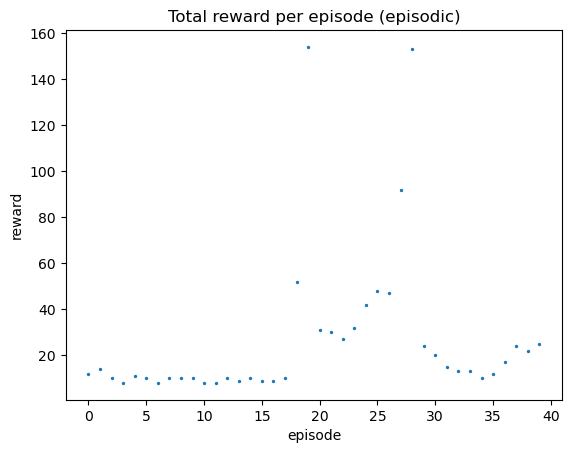

In [49]:
plt.scatter(np.arange(len(episode_rewards)), episode_rewards, s=2)
plt.title("Total reward per episode (episodic)")
plt.ylabel("reward")
plt.xlabel("episode")
plt.show()